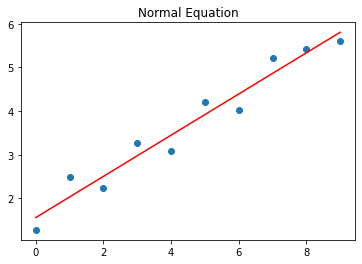

... Using normal equation
The w is: [0.47185909 1.55987676]
It cost 0.010707 s
The loss is: 0.48164064160859726



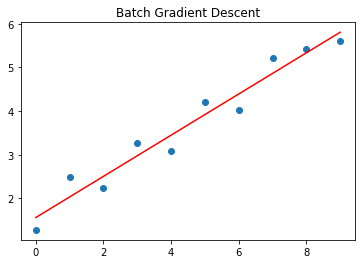

... Using batch gradient descent
The w is: [0.47185926 1.55987571]
It cost 0.694835 s
The loss is: 0.48164064161020237



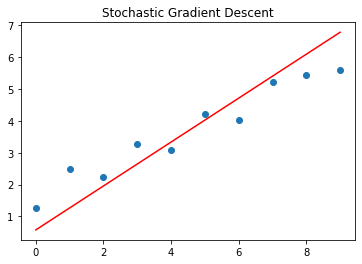

... Using stochastic gradient descent
The w is: [0.68966385 0.5742744 ]
It cost 0.050039 s
The loss is: 2.438646056184451



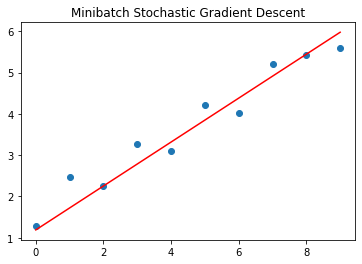

... Using minibatch stochastic gradient descent
The w is: [0.53196228 1.18792036]
It cost 0.050610 s
The loss is: 0.6821550524807558



In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import timeit
# y = 0.5 * x0 + 1 * x1

def load_dataset(n):
    noise = np.random.rand(n)
    X = [[x, 1.] for x in range(n)]
    y = [(0.5 * X[i][0]  + 1. + noise[i]) for i in range(n)]
    return np.array(X).T, np.array(y).T # 注意X，W，y的维数

class LinearRegression(object):
    def __init__(self, m):
        self.w = np.random.rand(m)

    # 计算预测值，点乘的顺序决定X是否为转置
    def predict(self, X):
        predict = np.dot(X, self.w)
        return predict

    # 计算损失函数
    def loss(self, y, predict):
        l = 0
        for i in range(len(y)):
            l += (y[i] - predict[i]) ** 2
        return 1/2 * l

    # 正规方程
    def normal_equation(self, X, y):

        start_time = timeit.default_timer()

        X = X.T
        X_T_X = np.linalg.pinv(X.T.dot(X)) # 奇异矩阵的伪逆矩阵
        self.w = np.dot(X_T_X, X.T).dot(y)

        end_time = timeit.default_timer()

        predict = self.predict(X)
        plt.figure(0)
        plt.scatter(range(len(y)), y)
        plt.plot(range(len(y)), predict, color='r')
        plt.title('Normal Equation')
        plt.show()
        print('... Using normal equation')
        print('The w is:', self.w)
        print('It cost %f s' % (end_time - start_time))
        print('The loss is:', self.loss(y, predict))
        print()

    # 批梯度下降
    def bgd(self, X, y):
        start_time = timeit.default_timer()

        loop_max = 10000 #最大迭代数
        epsilon = 0.000001 # 精度
        alpha = 0.0005 # 步长

        later_L = self.loss(y, self.predict(X.T))
        for loop in range(loop_max):
            # former_L = later_L
            for j in range(len(X)):
                tmp = 0
                for i in range(len(X[0])):
                    predict = self.predict(X.T)
                    tmp += (predict[i] - y[i]) * X[j][i] # predict和y的顺序问题
                self.w[j] = self.w[j] - alpha * tmp
            # later_L = self.loss(y, self.predict(X.T))

            # if former_L - later_L < epsilon:
            #   break

        end_time = timeit.default_timer()

        predict = self.predict(X.T)
        plt.figure(1)
        plt.scatter(range(len(y)), y)
        plt.plot(range(len(y)), predict, color='r')
        plt.title('Batch Gradient Descent')
        plt.show()
        print('... Using batch gradient descent')
        print('The w is:', self.w)
        print('It cost %f s' % (end_time - start_time))
        print('The loss is:', self.loss(y, predict))
        print()

    # 随机梯度下降
    def sgd(self, X, y):
        start_time = timeit.default_timer()

        loop_max = 10000 #最大迭代数
        epsilon = 0.000001 # 精度
        alpha = 0.0005 # 步长

        later_L = self.loss(y, self.predict(X.T))
        for loop in range(loop_max):
            # former_L = later_L
            tmp = self.w[0] * X[0][loop % len(X[0])] + self.w[1] * X[1][loop % len(X[0])] - y[loop % len(X[0])]
            for j in range(len(X)):
                self.w[j] = self.w[j] - alpha * tmp
            # later_L = self.loss(y, self.predict(X.T))

            # if former_L - later_L < epsilon:
            #   break

        end_time = timeit.default_timer()

        predict = self.predict(X.T)
        plt.figure(2)
        plt.scatter(range(len(y)), y)
        plt.plot(range(len(y)), predict, color='r')
        plt.title('Stochastic Gradient Descent')
        plt.show()
        print('... Using stochastic gradient descent')
        print('The w is:', self.w)
        print('It cost %f s' % (end_time - start_time))
        print('The loss is:', self.loss(y, predict))
        print()

    # 小批量随机梯度下降
    def msgd(self, X, y):
        batch_size = 2

        start_time = timeit.default_timer()

        loop_max = 10000 #最大迭代数
        epsilon = 0.000001 # 精度
        alpha = 0.0005 # 步长

        later_L = self.loss(y, self.predict(X.T))
        tmp = [0 for i in range(len(X))]
        for loop in range(int(loop_max / batch_size)):
            # former_L = later_L

            tmp[0] += (self.w[0] * X[0][loop % len(X[0])] + self.w[1] * X[1][loop % len(X[0])] - y[loop % len(X[0])]) * X[0][loop % len(X[0])]
            tmp[1] += (self.w[0] * X[0][loop % len(X[0])] + self.w[1] * X[1][loop % len(X[0])] - y[loop % len(X[0])]) * X[1][loop % len(X[0])]

            if loop % batch_size == 0:
                for j in range(len(X)):
                    self.w[j] -= alpha * tmp[j]
                    tmp[j] = 0

            # later_L = self.loss(y, self.predict(X.T))

            # if former_L - later_L < epsilon:
            #   break

        end_time = timeit.default_timer()

        predict = self.predict(X.T)
        plt.figure(2)
        plt.scatter(range(len(y)), y)
        plt.plot(range(len(y)), predict, color='r')
        plt.title('Minibatch Stochastic Gradient Descent')
        plt.show()
        print('... Using minibatch stochastic gradient descent')
        print('The w is:', self.w)
        print('It cost %f s' % (end_time - start_time))
        print('The loss is:', self.loss(y, predict))
        print()

X, y = load_dataset(10)

EN = LinearRegression(2)
EN.normal_equation(X, y)

BGD = LinearRegression(2)
BGD.bgd(X, y)

SGD = LinearRegression(2)
SGD.sgd(X, y)

MSGD = LinearRegression(2)
MSGD.msgd(X, y)

In [30]:
def load_dataset(n):
    noise = np.random.rand(n)
    X = [[x, 1.] for x in range(n)]
    y = [(0.5 * X[i][0]  + 1. + noise[i]) for i in range(n)]
    return np.array(X).T, np.array(y).T # 注意X，W，y的维数

In [33]:
X,Y = load_dataset(10)
print(X)
print('----')
print(Y)

[[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
----
[1.15424653 2.05680204 2.77972525 2.84147155 3.48766353 4.28400885
 4.33129003 4.91188831 5.15283119 6.08697726]
